In [61]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.applications.resnet50 import preprocess_input
import os
from keras.applications.resnet import ResNet50
from keras.applications.vgg16 import VGG16
from keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import utils
from keras.layers import Input, Flatten, Dense
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import pandas as pd
from tensorflow.keras.models import load_model

In [5]:
# Function for plotting model loss
def plot_loss(history):
    train_loss = history.history['loss']
    test_loss = history.history['val_loss']

    # Set figure size
    plt.figure(figsize=(12, 8))

    # Generate line plot of training, testing loss over epochs
    plt.plot(train_loss, label='Training Loss', color='#185fad')
    plt.plot(test_loss, label='Testing Loss', color='orange')

    # Set title
    plt.title('Training and Testing Loss by Epoch', fontsize = 25)
    plt.xlabel('Epoch', fontsize = 18)
    plt.ylabel('Categorical Crossentropy', fontsize = 18)
    plt.xticks(np.arange(10), np.arange(10))

    plt.legend(fontsize = 18);

### Reference:
- https://git.generalassemb.ly/dsi-delta/56-cnns/blob/main/workbook-in-class.ipynb

In [6]:
# Instantiating ResNet50 model:
model = ResNet50()

2022-10-15 22:34:16.395850: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Reference:
- https://keras.io/api/applications/resnet/

In [7]:
print(model.summary())

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [8]:
# Use if needed
# path = os.getcwd()

In [9]:
# importing training data:
data_path = './training'
data_dir = os.listdir(data_path)

In [10]:
data_dir # this is the data folder

['drinks',
 'ads',
 'vegetarian',
 'diserts',
 '.DS_Store',
 'places',
 'clutter',
 'non_vegetarian']

In [11]:
# Removing .DS_Store file:
data_dir.remove('.DS_Store')

In [12]:
img_data_list = []
labels = []

for data in data_dir:
    img_list = os.listdir(data_path+'/'+data)
    print('Loading images of', data)
    for img in img_list:
        img_path = data_path +'/'+ data + '/' + img
        try:
            img = image.load_img(img_path, target_size= (224,224))
            x = image.img_to_array(img)
            x = preprocess_input(x)
            img_data_list.append(x)
            labels.append(data)
        except:
            continue

Loading images of drinks
Loading images of ads


/opt/anaconda3/lib/python3.9/site-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Loading images of vegetarian
Loading images of diserts
Loading images of places
Loading images of clutter
Loading images of non_vegetarian


In [13]:
img_data_list[0]

array([[[ -87.939    , -108.779    ,  -32.68     ],
        [ -87.939    , -107.779    ,  -33.68     ],
        [ -86.939    , -108.779    ,  -35.68     ],
        ...,
        [ -81.939    , -106.779    , -115.68     ],
        [ -83.939    , -108.779    , -115.68     ],
        [ -83.939    , -108.779    , -115.68     ]],

       [[ -87.939    , -108.779    ,  -32.68     ],
        [ -87.939    , -107.779    ,  -33.68     ],
        [ -86.939    , -108.779    ,  -35.68     ],
        ...,
        [ -80.939    , -105.779    , -114.68     ],
        [ -83.939    , -108.779    , -115.68     ],
        [ -83.939    , -108.779    , -115.68     ]],

       [[ -87.939    , -108.779    ,  -32.68     ],
        [ -87.939    , -107.779    ,  -33.68     ],
        [ -86.939    , -108.779    ,  -35.68     ],
        ...,
        [ -80.939    , -105.779    , -114.68     ],
        [ -83.939    , -108.779    , -115.68     ],
        [ -83.939    , -108.779    , -115.68     ]],

       ...,

      

## Establishing a baseline:

In [64]:
# Checking the baseline
pd.DataFrame(labels).value_counts(normalize=True)

places            0.390213
non_vegetarian    0.315539
vegetarian        0.141722
ads               0.049571
clutter           0.048300
drinks            0.029552
diserts           0.025103
dtype: float64

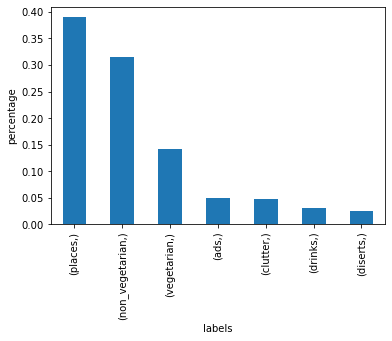

In [74]:
pd.DataFrame(labels).value_counts(normalize=True).plot(kind='bar', xlabel = 'labels', ylabel = 'percentage');

In [14]:
labels_data = np.array(img_data_list)

In [15]:
img_data.shape

(3147, 224, 224, 3)

In [16]:
np.save('train_data.npy', img_data)

In [17]:
np.save('train_labels.npy', labels)

In [18]:
img_data = np.load('train_data.npy')
labels = np.load('train_labels.npy')

In [23]:
len(img_data)

3147

In [24]:
len(labels)

3147

In [133]:
labels

array(['drinks', 'drinks', 'drinks', 'drinks', 'drinks', 'drinks',
       'drinks', 'drinks', 'drinks', 'drinks', 'drinks', 'drinks',
       'drinks', 'ads', 'ads', 'ads', 'ads', 'ads', 'ads', 'ads', 'ads',
       'ads', 'ads', 'ads', 'ads', 'ads', 'ads', 'ads', 'ads', 'ads',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetari

In [26]:
# Use if needed:
# num_class = 7
# num_of_samples = img_data.shape[0]

In [30]:
# convering labels into numerical values:

num_labels = []

for each in labels:
    if each == 'vegetarian':
        num_labels.append(0)
    elif each == 'non_vegetarian':
        num_labels.append(1)
    elif each == 'places':
        num_labels.append(2)
    elif each == 'diserts':
        num_labels.append(3)
    elif each == 'drinks':
        num_labels.append(4)
    elif each == 'clutter':
        num_labels.append(5)
    elif each == 'ads':
        num_labels.append(6)

In [31]:
num_labels= np.array(num_labels)

In [32]:
num_labels

array([4, 4, 4, ..., 1, 1, 1])

In [35]:
num_labels

array([4, 4, 4, ..., 1, 1, 1])

In [36]:
labels

array(['drinks', 'drinks', 'drinks', ..., 'non_vegetarian',
       'non_vegetarian', 'non_vegetarian'], dtype='<U14')

In [37]:
x = img_data

In [38]:
y = utils.to_categorical(num_labels, num_classes=7)

In [39]:
y[:2]

array([[0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

# Train Test Split:

In [44]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42, shuffle=True)

In [45]:
X_train.shape

(2517, 224, 224, 3)

In [46]:
X_test.shape

(630, 224, 224, 3)

# Modeling :

In [81]:
image_input = Input(shape=(224, 224,3))

In [82]:
model1 = ResNet50(input_tensor= image_input, include_top=True, weights= 'imagenet')
model1.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [83]:
last_layer = model1.get_layer('avg_pool').output

In [84]:
last_layer

<KerasTensor: shape=(None, 2048) dtype=float32 (created by layer 'avg_pool')>

In [85]:
x = Flatten(name='Flatten')(last_layer)

In [86]:
out = Dense(7, activation='softmax', name = 'output_layer')(x)

In [87]:
custom_resnet_model = Model(image_input, out)

In [88]:
custom_resnet_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [89]:
for layer in custom_resnet_model.layers[:-1]:
    layer.trainable=False
    
custom_resnet_model.layers[-1].trainable

True

In [90]:
custom_resnet_model.compile(loss='categorical_crossentropy',
                            optimizer= Adam(learning_rate=0.0001),
                            metrics=['acc'])

# Fitting the Model:

In [91]:
X_train.shape

(2517, 224, 224, 3)

In [92]:
history = custom_resnet_model.fit(X_train, y_train, 
                        batch_size=32,
                        epochs=25,
                        verbose=1,
                        validation_data=(X_test, y_test))

Epoch 1/25
79/79 [==============================] - 192s 2s/step - loss: 1.5195 - acc: 0.4728 - val_loss: 1.1000 - val_acc: 0.6746
Epoch 2/25
79/79 [==============================] - 184s 2s/step - loss: 0.9038 - acc: 0.7207 - val_loss: 0.8537 - val_acc: 0.7524
Epoch 3/25
79/79 [==============================] - 182s 2s/step - loss: 0.7222 - acc: 0.7644 - val_loss: 0.7363 - val_acc: 0.7683
Epoch 4/25
79/79 [==============================] - 181s 2s/step - loss: 0.6200 - acc: 0.7910 - val_loss: 0.6579 - val_acc: 0.7778
Epoch 5/25
79/79 [==============================] - 180s 2s/step - loss: 0.5524 - acc: 0.8176 - val_loss: 0.6241 - val_acc: 0.7857
Epoch 6/25
79/79 [==============================] - 181s 2s/step - loss: 0.5055 - acc: 0.8304 - val_loss: 0.5874 - val_acc: 0.8000
Epoch 7/25
79/79 [==============================] - 181s 2s/step - loss: 0.4723 - acc: 0.8403 - val_loss: 0.5689 - val_acc: 0.8016
Epoch 8/25
79/79 [==============================] - 181s 2s/step - loss: 0.4444 - a

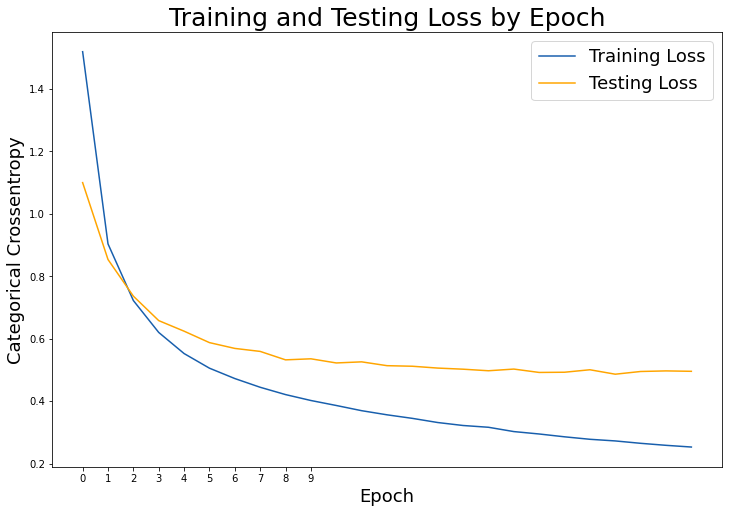

In [93]:
plot_loss(history)

In [94]:
from tensorflow.keras.models import load_model

custom_resnet_model.save('resnet3.h5')

new_model = load_model('resnet3.h5')

new_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

# Predicting on validation data:

In [95]:
data_path = './testing'
data_dir = os.listdir(data_path)

In [96]:
data_dir.remove('.DS_Store')

In [97]:
data_dir

['drinks',
 'ads',
 'vegetarian',
 'diserts',
 'places',
 'clutter',
 'non_vegetarian']

In [98]:
img_data_list = []
labels = []

for data in data_dir:
    img_list = os.listdir(data_path+'/'+data)
    print('Loading images of', data)
    for img in img_list:
        img_path = data_path+'/'+data + '/' +img
        try:
            img = image.load_img(img_path, target_size= (224,224))
            x = image.img_to_array(img)
            x = preprocess_input(x)
            img_data_list.append(x)
            labels.append(data)
        except:
            continue

Loading images of drinks
Loading images of ads
Loading images of vegetarian
Loading images of diserts
Loading images of places
Loading images of clutter
Loading images of non_vegetarian


In [99]:
img_data = np.array(img_data_list)

In [100]:
img_data.shape

(209, 224, 224, 3)

In [101]:
np.save('testing_data.npy', img_data)

In [102]:
np.save('testing_labels.npy', labels)

In [103]:
img_data = np.load('testing_data.npy')
labels = np.load('testing_labels.npy')

In [104]:
len(img_data)

209

In [105]:
len(labels)

209

In [106]:
labels

array(['drinks', 'drinks', 'drinks', 'drinks', 'drinks', 'drinks',
       'drinks', 'drinks', 'drinks', 'drinks', 'drinks', 'drinks',
       'drinks', 'ads', 'ads', 'ads', 'ads', 'ads', 'ads', 'ads', 'ads',
       'ads', 'ads', 'ads', 'ads', 'ads', 'ads', 'ads', 'ads', 'ads',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetari

In [107]:
num_class = 3
num_of_samples = img_data.shape[0]

In [87]:
num_of_samples

209

In [108]:
from tensorflow.keras.utils import to_categorical

In [109]:
names = ['vegetarian', 'places', 'non_vegetarian']

In [110]:
from tensorflow.keras import utils

In [111]:
num_labels = []

In [112]:
for each in labels:
    if each == 'vegetarian':
        num_labels.append(0)
    elif each == 'non_vegetarian':
        num_labels.append(1)
    elif each == 'places':
        num_labels.append(2)
    elif each == 'diserts':
        num_labels.append(3)
    elif each == 'drinks':
        num_labels.append(4)
    elif each == 'clutter':
        num_labels.append(5)
    elif each == 'ads':
        num_labels.append(6)

In [113]:
num_labels= np.array(num_labels)

In [114]:
num_labels

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [115]:
num_labels[:2]

array([4, 4])

In [116]:
labels

array(['drinks', 'drinks', 'drinks', 'drinks', 'drinks', 'drinks',
       'drinks', 'drinks', 'drinks', 'drinks', 'drinks', 'drinks',
       'drinks', 'ads', 'ads', 'ads', 'ads', 'ads', 'ads', 'ads', 'ads',
       'ads', 'ads', 'ads', 'ads', 'ads', 'ads', 'ads', 'ads', 'ads',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetari

In [117]:
x = img_data

In [118]:
y = utils.to_categorical(num_labels, num_classes=7)

In [124]:
from sklearn.metrics import classification_report

In [119]:
custom_resnet_model.evaluate(x,y, batch_size=10, verbose=1)

21/21 [==============================] - 13s 600ms/step - loss: 1.3429 - acc: 0.5742


[1.342905879020691, 0.5741626620292664]

In [125]:
pred = custom_resnet_model.predict(x, batch_size=32, verbose=1)

7/7 [==============================] - 13s 2s/step


In [126]:
predicted = np.argmax(pred, axis=1)

In [134]:
target_names = ['vegetarian', 'non_vegetarian', 'places', 'diserts', 'drinks', 'clutter', 'ads']

In [135]:
report = classification_report(np.argmax(y, axis=1), predicted, target_names=target_names)

In [136]:
print(report)

                precision    recall  f1-score   support

    vegetarian       0.92      0.32      0.47        72
non_vegetarian       0.38      0.81      0.52        47
        places       0.79      0.84      0.82        32
       diserts       0.64      0.47      0.54        15
        drinks       0.77      0.77      0.77        13
       clutter       0.44      0.31      0.36        13
           ads       0.65      0.65      0.65        17

      accuracy                           0.57       209
     macro avg       0.66      0.59      0.59       209
  weighted avg       0.70      0.57      0.57       209



In [129]:
# Use if needed to check the images:
# plt.imshow(X_test[156])

In [101]:
custom_resnet_model.save('resnet3.h5')

new_model = load_model('resnet3.h5')

new_model.summary()